# Data Science Compensation Analysis
## IST 707 Applied Machine Learning
### Shivangi Mundhra | 842548148

Predict the salary range for full time data science jobs across different job titles, countries, experience level, and company size.

## Read in Data

In [99]:
# mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
# read in the data and import libraries
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/salaries.csv")

In [101]:
df.head()

work_year experience_level employment_type                job_title  \
0       2022               EN              FT  Data Analytics Engineer   
1       2022               SE              FT            Data Engineer   
2       2022               SE              FT            Data Engineer   
3       2022               SE              FT            Data Engineer   
4       2022               SE              FT            Data Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   13000             USD          13000                 AR           100   
1  100000             USD         100000                 US             0   
2   78000             USD          78000                 US             0   
3  120000             USD         120000                 US             0   
4   95000             USD          95000                 US             0   

  company_location company_size  
0               AR            S  
1               US            M  
2               US            M  
3               US            M  
4               US            M

In [102]:
# df = df.sample(n = 10000, replace = True, random_state = 2022, ignore_index = True)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1637 entries, 0 to 1636
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1637 non-null   int64 
 1   experience_level    1637 non-null   object
 2   employment_type     1637 non-null   object
 3   job_title           1637 non-null   object
 4   salary              1637 non-null   int64 
 5   salary_currency     1637 non-null   object
 6   salary_in_usd       1637 non-null   int64 
 7   employee_residence  1637 non-null   object
 8   remote_ratio        1637 non-null   int64 
 9   company_location    1637 non-null   object
 10  company_size        1637 non-null   object
dtypes: int64(4), object(7)
memory usage: 140.8+ KB


In [104]:
df.head()

work_year experience_level employment_type                job_title  \
0       2022               EN              FT  Data Analytics Engineer   
1       2022               SE              FT            Data Engineer   
2       2022               SE              FT            Data Engineer   
3       2022               SE              FT            Data Engineer   
4       2022               SE              FT            Data Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   13000             USD          13000                 AR           100   
1  100000             USD         100000                 US             0   
2   78000             USD          78000                 US             0   
3  120000             USD         120000                 US             0   
4   95000             USD          95000                 US             0   

  company_location company_size  
0               AR            S  
1               US            M  
2               US            M  
3               US            M  
4               US            M

## Data Pre-processing

In [105]:
# create a base 2022 salary by taking inflation into account
import numpy as np

df['2022salary'] = np.where(df['work_year'] == 2022, round(df['salary_in_usd'], None),
                            np.where(df['work_year'] == 2021, round(df['salary_in_usd'] * 1.0775, None), round(df['salary_in_usd'] * 1.047 * 1.0775, None)))

In [106]:
df[df['work_year'] == 2021]

work_year experience_level employment_type  \
28         2021               EN              FT   
214        2021               MI              FL   
425        2021               SE              FT   
458        2021               EN              FT   
459        2021               MI              FT   
...         ...              ...             ...   
1629       2021               MI              FT   
1630       2021               MI              FT   
1631       2021               SE              FT   
1633       2021               MI              FT   
1636       2021               SE              FT   

                               job_title   salary salary_currency  \
28         3D Computer Vision Researcher    20000             USD   
214        Autonomous Vehicle Technician    45555             USD   
425        3D Computer Vision Researcher     5000             USD   
458                   Power BI Developer   400000             INR   
459                        Data Engineer   100000             AUD   
...                                  ...      ...             ...   
1629  Applied Machine Learning Scientist   423000             USD   
1630                       Data Engineer    24000             EUR   
1631                     Data Specialist   165000             USD   
1633            Principal Data Scientist   151000             USD   
1636                Data Science Manager  7000000             INR   

      salary_in_usd employee_residence  remote_ratio company_location  \
28            20000                 AS             0               AS   
214           45555                 AS            50               BS   
425            5000                 US           100               US   
458            5409                 IN            50               IN   
459           75050                 AU            50               AU   
...             ...                ...           ...              ...   
1629         423000                 US            50               US   
1630          28369                 MT            50               MT   
1631         165000                 US           100               US   
1633         151000                 US           100               US   
1636          94665                 IN            50               IN   

     company_size  2022salary  
28              M     21550.0  
214             M     49086.0  
425             L      5387.0  
458             L      5828.0  
459             L     80866.0  
...           ...         ...  
1629            L    455782.0  
1630            L     30568.0  
1631            L    177787.0  
1633            L    162702.0  
1636            L    102002.0  

[225 rows x 12 columns]

In [107]:
# Removing unnecessary columns
df = df.drop(columns = ['work_year', 'salary', 'salary_currency', 'remote_ratio', 'company_location', 'salary_in_usd'])

In [108]:
# Removing unnecessary columns
# df2 = df2.drop(columns = ['work_year', 'salary', 'salary_currency', 'remote_ratio', 'company_location'])

In [109]:
# selecting only one variable(full-time) from column employment_type
df = df[df.employment_type == 'FT']

In [110]:
# selecting only one variable(full-time) from column employment_type
# df2 = df2[df2.employment_type == 'FT']

In [111]:
# Removing employment_type columns because now we have only FT based results
df = df.drop(columns = ['employment_type'])

In [112]:
# Removing employment_type columns because now we have only FT based results
# df2 = df2.drop(columns = ['employment_type'])

In [113]:
# # modify employee_residence variable to show US and Other values only
# # factorize company_location and group non-USA entries 
# def not_usa(x):
#     if x != 'US':
#         return 0
#     return 1

# df['employee_residence_fact'] = df['employee_residence'].apply(not_usa)

In [114]:
# selecting only US records
df = df[df.employee_residence == 'US']

In [115]:
# selecting only US records
# df2 = df2[df2.employee_residence == 'US']

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1167 entries, 1 to 1634
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   experience_level    1167 non-null   object 
 1   job_title           1167 non-null   object 
 2   employee_residence  1167 non-null   object 
 3   company_size        1167 non-null   object 
 4   2022salary          1167 non-null   float64
dtypes: float64(1), object(4)
memory usage: 54.7+ KB


In [117]:
# drop the employee_residence variable because we don't need it anymore
df = df.drop(columns = ['employee_residence'])

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1167 entries, 1 to 1634
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   experience_level  1167 non-null   object 
 1   job_title         1167 non-null   object 
 2   company_size      1167 non-null   object 
 3   2022salary        1167 non-null   float64
dtypes: float64(1), object(3)
memory usage: 45.6+ KB


In [119]:
# take a sample of 10000 records
# df = df.sample(n = 10000, replace = True, random_state = 2022, ignore_index = True)

In [120]:
# rename the salary column
df = df.rename({"2022salary" : "salary"}, axis = 1)

In [121]:
df = df.dropna()
df.isnull().sum()

experience_level    0
job_title           0
company_size        0
salary              0
dtype: int64

In [122]:
# df['experience_level_fact'] = pd.factorize(df['experience_level'])[0]
# salaries['employee_residence_fact'] = p.factorize(salaries['employee_residence'])[0]
# df['company_size_fact'] = pd.factorize(df['company_size'])[0]
# salaries['job_title_fact'] = p.factorize(salaries['job_title'])[0]

In [123]:
# add a non-factorial column of country of residence for employees
# import numpy as np
# df['country'] = np.where(df['employee_residence_fact'] == 1, 'United States of America', 'Other')

In [124]:
# # compare salaries between USA and
# fig, ax = plt.subplots(1, 1, figsize = (12, 7))
# df.boxplot('salary', 'country', ax = ax)
# plt.suptitle('Salary (US$) v Country')
# plt.title('')
# plt.ylabel('Salary')
# plt.xticks(rotation = 0)
# plt.show()

In [125]:
# # compare salaries (USD) between all countries
# fig, ax = plt.subplots(1, 1, figsize = (20, 12))
# df.boxplot('salary', 'employee_residence', ax = ax)
# plt.suptitle('Salary (US$) v Country')
# plt.title('')
# plt.ylabel('Salary')
# plt.xticks(rotation = 90)
# plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


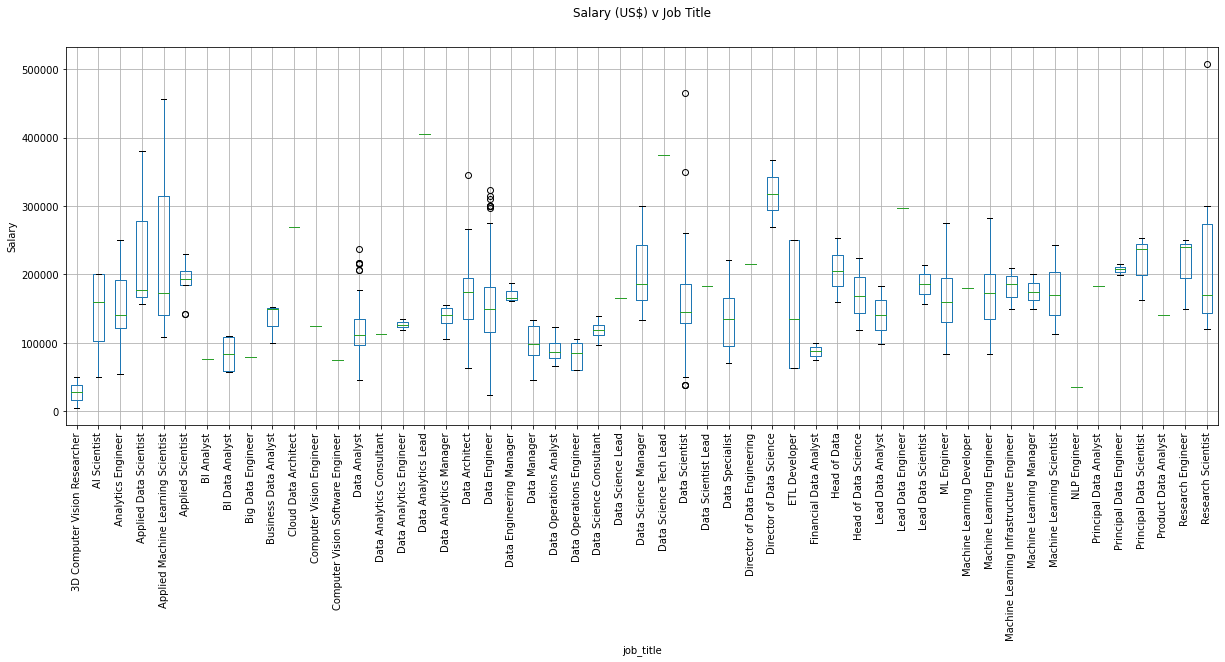

In [126]:
# compare salaries between USA and other
fig, ax = plt.subplots(1, 1, figsize = (20, 7))
df.boxplot('salary', 'job_title', ax = ax)
plt.suptitle('Salary (US$) v Job Title')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation = 90)
plt.show()

In [127]:
# add data science job category
df['jobGroup'] = np.where(df['job_title'].str.split().str[-1].isin(['Analyst', 'Consultant', 'Developer', 'Specialist']), 'Analyst',
                          np.where(df['job_title'].str.split().str[-1].isin(['Architect', 'Engineer', 'Engineering']), 'Engineer',
                                   np.where(df['job_title'].str.split().str[-1].isin(['Researcher', 'Scientist']), 'Scientist', 'Manager')))

In [128]:
df.head()

experience_level        job_title company_size    salary  jobGroup
1               SE    Data Engineer            M  100000.0  Engineer
2               SE    Data Engineer            M   78000.0  Engineer
3               SE    Data Engineer            M  120000.0  Engineer
4               SE    Data Engineer            M   95000.0  Engineer
5               SE  Data Specialist            M  110000.0   Analyst

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


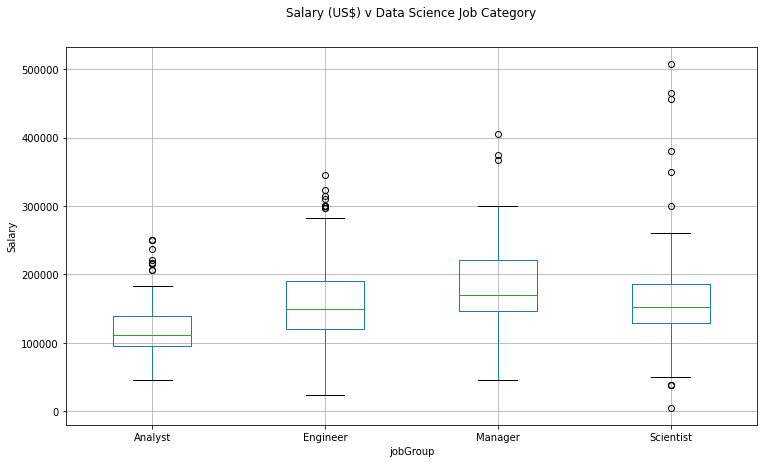

In [129]:
# compare salaries between job categories
fig, ax = plt.subplots(1, 1, figsize = (12, 7))
df.boxplot('salary', 'jobGroup', ax = ax)
plt.suptitle('Salary (US$) v Data Science Job Category')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation = 0)
plt.show()

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1167 entries, 1 to 1634
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   experience_level  1167 non-null   object 
 1   job_title         1167 non-null   object 
 2   company_size      1167 non-null   object 
 3   salary            1167 non-null   float64
 4   jobGroup          1167 non-null   object 
dtypes: float64(1), object(4)
memory usage: 54.7+ KB


In [131]:
# drop columns that we won't need
df = df.drop(['job_title'], axis = 1)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1167 entries, 1 to 1634
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   experience_level  1167 non-null   object 
 1   company_size      1167 non-null   object 
 2   salary            1167 non-null   float64
 3   jobGroup          1167 non-null   object 
dtypes: float64(1), object(3)
memory usage: 45.6+ KB


Text(0, 0.5, '% of records')

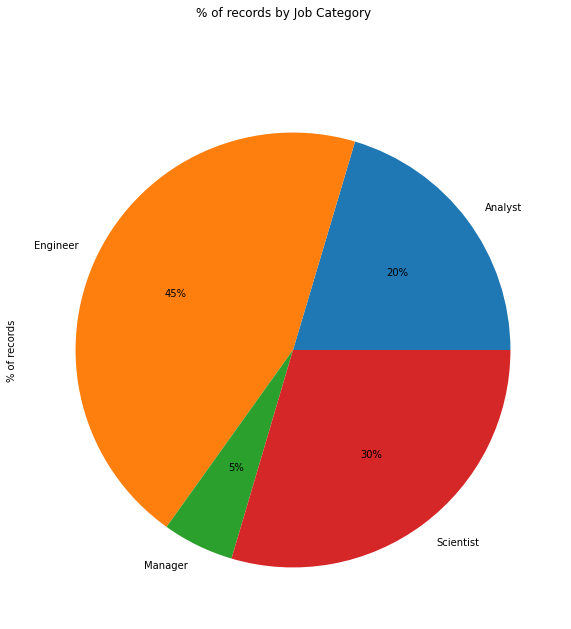

In [142]:
df.groupby(['jobGroup']).count().plot(kind = 'pie', y = 'experience_level', autopct = '%1.0f%%', figsize = (10, 10), legend = False)
plt.suptitle('% of records by Job Category')
plt.ylabel('% of records')

Text(0.5, 0, 'Job Categories')

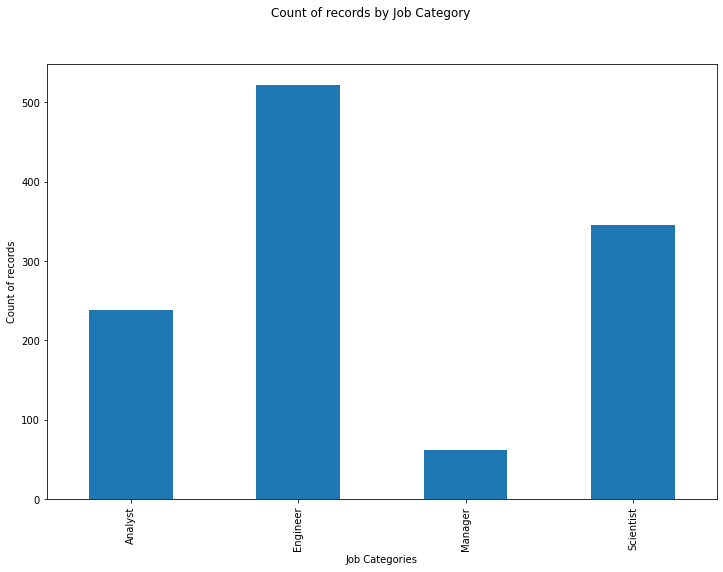

In [146]:
df.groupby(['jobGroup']).count().plot(kind = 'bar', y = 'experience_level', figsize = (12,8), legend = False)
plt.suptitle('Count of records by Job Category')
plt.ylabel('Count of records')
plt.xlabel('Job Categories')

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


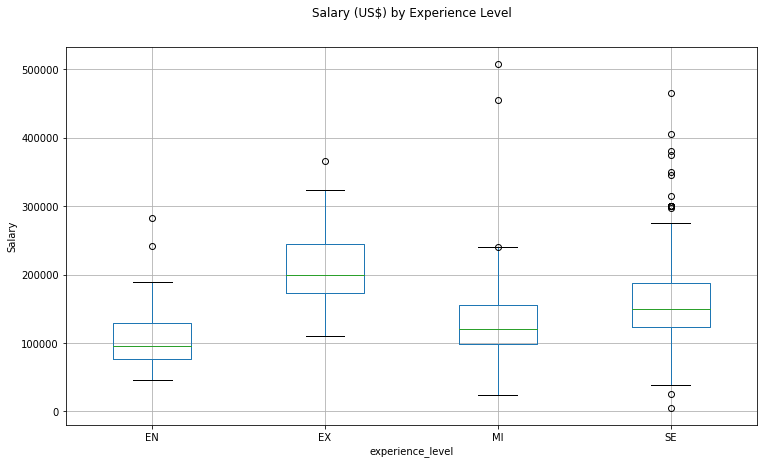

In [147]:
# compare salaries between experience levels
fig, ax = plt.subplots(1, 1, figsize = (12, 7))
df.boxplot('salary', 'experience_level', ax = ax)
plt.suptitle('Salary (US$) by Experience Level')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation = 0)
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


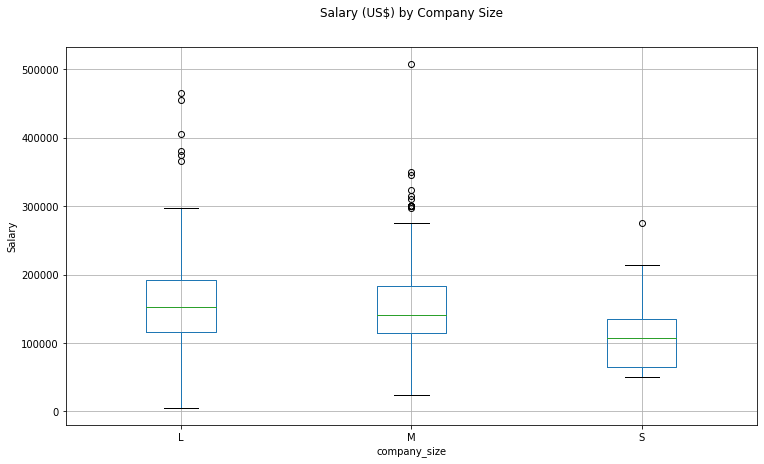

In [148]:
# compare salaries between different company sizes
fig, ax = plt.subplots(1, 1, figsize = (12, 7))
df.boxplot('salary', 'company_size', ax = ax)
plt.suptitle('Salary (US$) by Company Size')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation = 0)
plt.show()

In [149]:
# to factorize values in all these variables
from sklearn.preprocessing import LabelEncoder
le_exp = LabelEncoder()
df['experience'] = le_exp.fit_transform(df['experience_level'])
df['experience'].unique()
# drop columns that we won't need
df = df.drop(['experience_level'], axis = 1)
#le.classes_

In [150]:
# # factorize country values
# le_country = LabelEncoder()
# df['country'] = le_country.fit_transform(df['country'])
# df['country'].unique()

In [151]:
# factorize company size values
le_size = LabelEncoder()
df['companySize'] = le_size.fit_transform(df['company_size'])
df['companySize'].unique()
df = df.drop(['company_size'], axis = 1)

In [152]:
# factorize jobgroup values
le_job = LabelEncoder()
df['job'] = le_job.fit_transform(df['jobGroup'])
df['job'].unique()
df = df.drop(['jobGroup'], axis = 1)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1167 entries, 1 to 1634
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   salary       1167 non-null   float64
 1   experience   1167 non-null   int64  
 2   companySize  1167 non-null   int64  
 3   job          1167 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 45.6 KB


In [154]:
# df = df.drop(['compSize', 'jobFactor', 'countryFactor'], axis = 1)

In [155]:
# define target variable and predictors
X = df.drop('salary', axis = 1).values
y = df['salary'].values

## Split train/test data

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_train[0])
print(y_train[0])
print(X_test[0])
print(y_test[0])

(933, 3) (933,) (234, 3) (234,)
[2 1 0]
112000.0
[3 1 0]
116000.0


## Linear Regressor

In [157]:
# initiate a base linear regression model
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [158]:
y_pred = linear_reg.predict(X_test)

In [159]:
# test the regressor on the test data set, print scores

from sklearn.metrics import mean_squared_error, mean_absolute_error
rmserror = np.sqrt(mean_squared_error(y_test, y_pred))

In [160]:
rmserror

52030.770423170696

In [161]:
mean_absolute_error(y_test, y_pred)

40157.406333518345

This means that on average our model is off by $55k.

In [162]:
# linearMse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
# linearMae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

Mean Squared Error:  2707201070.828695
Mean Absolute Error:  40157.406333518345


## Tune Linear Regression

In [164]:
# tune linear model parameters using grid search
from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LinearRegression
# n_neighbors = range(0, 100, 1)
fit_intercept = [True, False]
normalize = [True, False]
copy_X = [True, False]
n_jobs = [None,1,2,3,4,5,6,7,8,9,10]
positive = [True, False]
parameters = {"fit_intercept": fit_intercept, "normalize": normalize, "copy_X": copy_X, "n_jobs":n_jobs, "positive":positive}
lRegressor = LinearRegression()
lGs = GridSearchCV(lRegressor, parameters, scoring = 'neg_mean_squared_error')
lGs.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/us

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'normalize': [True, False],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error')

In [165]:
lRegressor = lGs.best_estimator_

lRegressor.fit(X_train, y_train)
y_pred = lRegressor.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("${:,.02f}".format(error))

$52,030.77


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [166]:
lGs.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': True,
 'positive': False}

In [167]:
# linearMse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
# linearMae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

Mean Squared Error:  2707201070.8286934
Mean Absolute Error:  40157.40633351833


## Decision Tree

In [168]:
# initiate a base decision tree regressor model
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state = 2022)
dec_tree_reg.fit(X_train, y_train)
#dec_tree_reg.get_params()

DecisionTreeRegressor(random_state=2022)

In [169]:
y_pred = dec_tree_reg.predict(X_test)

In [170]:
rmserror = np.sqrt(mean_squared_error(y_test, y_pred))
print("${:,.02f}".format(rmserror))

$49,549.50


The error for decision tree model is a bit better.

In [171]:
# linearMse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
# linearMae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

Mean Squared Error:  2455153317.2169256
Mean Absolute Error:  37631.76336605468


In [172]:
from sklearn import tree
# plot decision tree
fig = plt.figure(figsize = (200, 200))
_fig = tree.plot_tree(dec_tree_reg, feature_names = df.columns[1:],
                      # class_names = train.columns[0],
                      filled = True)

## Tune Decision Tree

In [173]:
# tune decision tree model parameters using grid search with cross validation
from sklearn.model_selection import GridSearchCV

# define max_depth values that the grid search will loop through
max_depth = [None,1,2,4,5,6,7,8,9,10]
criterion = ["squared_error", "friedman_mse", "absolute_error", "poisson"]
splitter = ["best", "random"]
min_samples_split = [1,2,3]
min_samples_leaf = [1,2,3]
max_features = [None, "auto", "sqrt", "log2"]
parameters = {"max_depth": max_depth, "criterion": criterion, "splitter": splitter, "min_samples_split": min_samples_split,
              "min_samples_leaf": min_samples_leaf, "max_features": max_features}
regressor = DecisionTreeRegressor(random_state = 2022)
gs = GridSearchCV(regressor, parameters, scoring = 'neg_mean_squared_error')
gs.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
4800 fits failed out of a total of 14400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 1315, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0];

GridSearchCV(estimator=DecisionTreeRegressor(random_state=2022),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [None, 1, 2, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [174]:
regressor = gs.best_estimator_

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("${:,.02f}".format(error))

$49,160.13


In [175]:
gs.best_params_

{'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

In [176]:
# linearMse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
# linearMae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

Mean Squared Error:  2416718025.0019627
Mean Absolute Error:  36967.336760087725


In [177]:
# from sklearn import tree
# plot decision tree
fig = plt.figure(figsize = (200, 200))
_fig = tree.plot_tree(regressor, feature_names = df.columns[1:], filled = True)
                      # class_names = train.columns[0], filled = True)

## Random Forest

In [178]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state = 2022)
random_forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=2022)

In [179]:
y_pred = random_forest_reg.predict(X_test)

In [180]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("${:,.02f}".format(error))

$49,393.30


Random Forest genrates the least error

In [181]:
# linearMse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
# linearMae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

Mean Squared Error:  2439697741.861108
Mean Absolute Error:  37485.28753854479


## Tune Random Forest

In [219]:
# tune random forest model parameters using grid search
from sklearn.model_selection import GridSearchCV
n_estimators = range(1, 100, 2)
criterion = ["squared_error", "absolute_error", "poisson"]
max_depth = [None,2]
# min_samples_split = [1,2,3]
# min_samples_leaf = [1,2,3]
# max_features = ["sqrt", "log2", None]
# n_jobs = [None, 1, 2, 3]
parameters = {"n_estimators":n_estimators, "max_depth":max_depth, "criterion": criterion}
rfRegressor = RandomForestRegressor(random_state = 2022)
rfgs = GridSearchCV(rfRegressor, parameters, scoring = 'neg_mean_squared_error')
rfgs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=2022),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [None, 2],
                         'n_estimators': range(1, 100, 2)},
             scoring='neg_mean_squared_error')

In [220]:
rfRegressor = rfgs.best_estimator_

rfRegressor.fit(X_train, y_train)
y_pred = rfRegressor.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("${:,.02f}".format(error))

$49,704.20


In [221]:
rfgs.best_params_

{'criterion': 'squared_error', 'max_depth': None, 'n_estimators': 25}

In [222]:
# linearMse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
# linearMae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

Mean Squared Error:  2470507494.5272427
Mean Absolute Error:  37609.33675225791


## SVM

In [186]:
from sklearn import svm
svmReg = svm.SVR()
svmReg.fit(X_train, y_train)
y_pred = svmReg.predict(X_test)

In [187]:
rmserror = np.sqrt(mean_squared_error(y_test, y_pred))
print("${:,.02f}".format(rmserror))

$52,425.94


In [188]:
# linearMse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
# linearMae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

Mean Squared Error:  2748478668.0783825
Mean Absolute Error:  39769.6805852116


## kNN Regressor

In [189]:
from sklearn.neighbors import KNeighborsRegressor
knnReg = KNeighborsRegressor()
knnReg.fit(X_train, y_train)
y_pred = knnReg.predict(X_test)

In [190]:
rmserror = np.sqrt(mean_squared_error(y_test, y_pred))
print("${:,.02f}".format(rmserror))

$57,532.26


In [191]:
# linearMse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
# linearMae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

Mean Squared Error:  3309960836.7776065
Mean Absolute Error:  45181.429914529916


## Tune kNN Model

In [196]:
# tune kNN model parameters using grid search

n_neighbors = range(0, 100, 1)
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
parameters = {"n_neighbors":n_neighbors, "weights":weights, "algorithm":algorithm}
knnRegressor = KNeighborsRegressor()
knnGs = GridSearchCV(knnRegressor, parameters, scoring = 'neg_mean_squared_error')
knnGs.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 4000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_regression.py", line 213, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py", line 569, in _fit
    raise ValueError("Expected n_neighbors > 0. Got %d" % self.n_neighbors)
ValueError: Expected

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(0, 100),
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [197]:
knnRegressor = knnGs.best_estimator_

knnRegressor.fit(X_train, y_train)
y_pred = knnRegressor.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("${:,.02f}".format(error))

$49,656.68


In [198]:
knnGs.best_params_

{'algorithm': 'brute', 'n_neighbors': 72, 'weights': 'distance'}

In [199]:
# linearMse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
# linearMae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

Mean Squared Error:  2465785430.172667
Mean Absolute Error:  37848.260655468635


## Gaussian Regression

In [208]:
from sklearn.gaussian_process import GaussianProcessRegressor
gpReg = GaussianProcessRegressor(random_state = 2022)
gpReg.fit(X_train, y_train)
y_pred = gpReg.predict(X_test)

In [209]:
rmserror = np.sqrt(mean_squared_error(y_test, y_pred))
print("${:,.02f}".format(rmserror))

$49,549.58


In [210]:
# linearMse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
# linearMae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

Mean Squared Error:  2455161244.7890773
Mean Absolute Error:  37631.61168077257


## Tune Gaussian Regression

In [211]:
# tune gaussian model parameters using grid search

# n_neighbors = range(0, 100, 1)
# weights = ['uniform', 'distance']
# algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
n_restarts_optimizer = range(0, 10, 1)
normalize_y = [True, False]
copy_X_train = [True, False]
parameters = {"n_restarts_optimizer":n_restarts_optimizer, "normalize_y":normalize_y, "copy_X_train":copy_X_train}
gRegressor = GaussianProcessRegressor(random_state = 2022)
gGs = GridSearchCV(gRegressor, parameters, scoring = 'neg_mean_squared_error')
gGs.fit(X_train, y_train)

GridSearchCV(estimator=GaussianProcessRegressor(random_state=2022),
             param_grid={'copy_X_train': [True, False],
                         'n_restarts_optimizer': range(0, 10),
                         'normalize_y': [True, False]},
             scoring='neg_mean_squared_error')

In [212]:
gRegressor = gGs.best_estimator_

gRegressor.fit(X_train, y_train)
y_pred = gRegressor.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("${:,.02f}".format(error))

$49,549.26


In [213]:
gGs.best_params_

{'copy_X_train': True, 'n_restarts_optimizer': 0, 'normalize_y': True}

In [214]:
# linearMse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
# linearMae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

Mean Squared Error:  2455129475.4259796
Mean Absolute Error:  37631.77350124241


## Logistic Regression

In [205]:
from sklearn.linear_model import LogisticRegression
loReg = LogisticRegression(random_state = 2022)
loReg.fit(X_train, y_train)
y_pred = loReg.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [206]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
rmserror = np.sqrt(mean_squared_error(y_test, y_pred))
print("${:,.02f}".format(rmserror))

$62,167.75


In [207]:
# linearMse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
# linearMae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

Mean Squared Error:  3864829664.5555553
Mean Absolute Error:  46542.470085470086


## Tune Logistic Regression model

In [215]:
from sklearn.model_selection import GridSearchCV

# tune linear model parameters using grid search
# from sklearn.linear_model import LinearRegression
# n_neighbors = range(0, 100, 1)
# penalty = ['l1', 'l2', 'elasticnet', 'none']
# dual = [True, False]
# fit_intercept = [True, False]
# class_weight = [None,'balanced']
# solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = range(200, 1000, 100)
# multi_class = ['auto', 'ovr', 'multinomial']
# verbose = [0, 5]
# warm_start = [True, False]
parameters = {"max_iter": max_iter}
loRegressor = LogisticRegression()
loGs = GridSearchCV(loRegressor, parameters, scoring = 'neg_mean_squared_error')
loGs.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'max_iter': range(200, 1000, 100)},
             scoring='neg_mean_squared_error')

In [216]:
loRegressor = loGs.best_estimator_

loRegressor.fit(X_train, y_train)
y_pred = loRegressor.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("${:,.02f}".format(error))

$62,420.37


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [217]:
loGs.best_params_

{'max_iter': 200}

In [218]:
# linearMse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
# linearMae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

Mean Squared Error:  3896303168.8290596
Mean Absolute Error:  46927.08547008547


## Test using an example

In [ ]:
df

salary  country  experience  companySize  job
0     191200        1           3            1    1
1     130000        1           3            1    1
2     225000        1           3            1    3
3     156400        1           3            1    3
4     169000        1           3            1    0
...      ...      ...         ...          ...  ...
1402  165000        1           3            0    0
1403  412000        1           3            0    3
1404  151000        1           2            0    3
1405  105000        1           0            2    3
1407   94665        0           3            0    2

[1380 rows x 5 columns]

In [ ]:
X

array([[1, 3, 1, 1],
       [1, 3, 1, 1],
       [1, 3, 1, 3],
       ...,
       [1, 2, 0, 3],
       [1, 0, 2, 3],
       [0, 3, 0, 2]])

In [ ]:
# run through a quick example
# predict salary using the most efficient model for
# senior analyst at large company in the USA
Z = np.array([['United States of America', 'SE', 'L', 'Analyst']])
Z

array([['United States of America', 'SE', 'L', 'Analyst']], dtype='<U24')

In [ ]:
# transform the parameters
Z[:,0] = le_country.transform(Z[:,0])
Z[:,1] = le_exp.transform(Z[:,1])
Z[:,2] = le_size.transform(Z[:,2])
Z[:,3] = le_job.transform(Z[:,3])
Z = Z.astype(float)
Z

array([[1., 3., 0., 0.]])

In [ ]:
# predict salary based on inputs
z_pred = regressor.predict(Z)
z_pred

array([154260.])

## Save the model

In [ ]:
# save model using pickle
import pickle

In [ ]:
# save the model to a local file
data = {"model": regressor, "le_country": le_country, "le_exp": le_exp, "le_size": le_size, "le_job": le_job}
with open('saved_steps.pkl', 'wb') as file:
  pickle.dump(data, file)

In [ ]:
with open('saved_steps.pkl', 'rb') as file:
  data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_exp = data["le_exp"]
le_size = data["le_size"]
le_job = data["le_job"]

In [ ]:
z_pred = regressor_loaded.predict(Z)
z_pred

array([154260.])